In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Reading in the Data

In [13]:
data = pd.read_csv("regression-data-set.csv")
data

,x,y
0,1.00,3.14
1,1.14,3.17
2,1.28,3.09
3,1.42,3.08
4,1.57,3.09
...,...,...
95,14.43,2.99
96,14.58,2.92
97,14.72,2.88
98,14.86,2.90


In [14]:
x = data.x.to_numpy()
y = data.y.to_numpy()

# Analyzing the RMS Error

In [15]:
#     I would like to make this work
#     split = int(len(x)*split)
#     data  = np.random.shuffle(zip(x,y))
#     x,y = data[0], data[1]
#     X_train = x[:split]
#     Y_train = y[:split]
#     X_test = x[split:]
#     Y_test = y[split:]

Maybe its the way I implemented this but I found the sklearn method to slow down dramatically at higher degrees of fit.

In [16]:
def skl_poly_regression(x, y, degree, split):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=split)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    poly_regression = make_pipeline(PolynomialFeatures(degree=degree))
    x_Poly = poly_regression.fit_transform(X_train)
    poly_regression.fit(x_Poly, y_train)
    linear_regression = LinearRegression()
    linear_regression.fit(x_Poly, y_train)
    y_preds = linear_regression.predict(poly_regression.fit_transform(X_test))
    rms = np.sqrt(((y_preds - y_test)**2).sum()/len(y_preds))
    return rms

The numpy approach worked incredibly well. It ran at a consistent speed all the way through.

In [17]:
import warnings

def np_poly_regression(x,y,degree,split):
    
    # Train Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(x,y,train_size=split)
    X_train = X_train.reshape(-1)
    X_test = X_test.reshape(-1)

    # Fitting the Model
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        z = np.polyfit(X_train, Y_train, degree)
        p = np.poly1d(z)
        
    # Get Predictions
    preds = p(X_test)
    
    # Return RMS
    return np.sqrt( ((preds - Y_test)**2).sum() / len(preds) )
     

In [18]:
np_poly_regression(x,y,2,0.8)

0.16746038594637097

In [28]:
degree_means = []
degree_stds = []
# Degree
for degree in range(1,16):
#     print(degree)
    rms_errors = []
    # 100 RMS
    for _ in range(100):
#         rms = skl_poly_regression(x=x, y=y, degree=degree, split=0.8)
        rms = np_poly_regression(x=x,y=y,degree=degree, split=0.8)
        rms_errors.append(rms)
    degree_means.append(np.mean(rms_errors))
    degree_stds.append(np.std(rms_errors))

In [29]:
logged_degree_means = np.log(degree_means)
degree_upper = np.log(degree_means + np.array(degree_stds))
degree_lower = np.log(degree_means - np.array(degree_stds))

/home/frostburn/Virtual/nflux/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


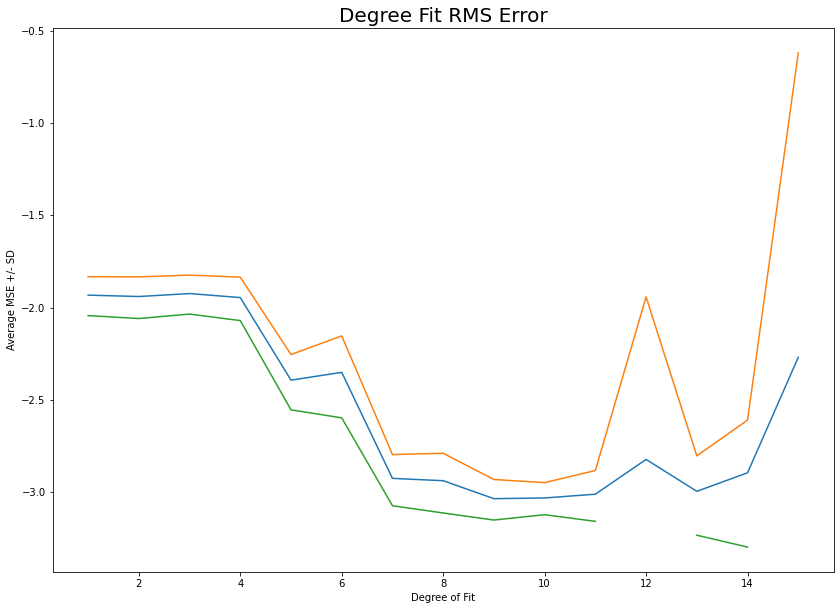

In [30]:
plt.title("Degree Fit RMS Error", fontsize=20)
plt.xlabel("Degree of Fit")
plt.ylabel("Average MSE +/- SD")
plt.plot(np.linspace(1,15,15), logged_degree_means)
plt.plot(np.linspace(1,15,15), degree_upper)
plt.plot(np.linspace(1,15,15), degree_lower)
fig = plt.gcf()
fig.set_size_inches(14,10)

# Plotting the Best Fit

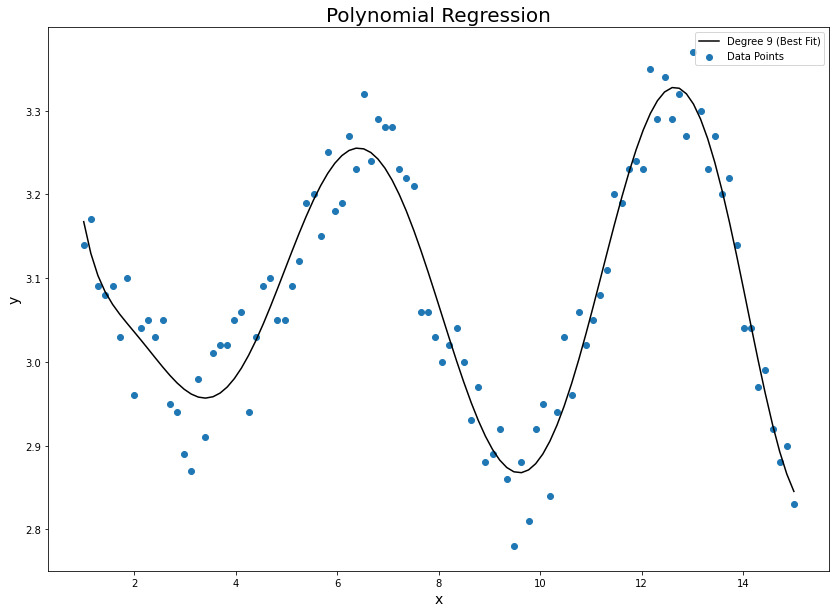

In [11]:
plt.scatter(x,y, label="Data Points")
x = x.reshape(-1,1)
poly_regression = make_pipeline(PolynomialFeatures(degree=9))
xPoly = poly_regression.fit_transform(x)
poly_regression.fit(xPoly,y)
linear_regression = LinearRegression()
linear_regression.fit(xPoly,y)
plt.plot(x,
         linear_regression.predict(poly_regression.fit_transform(x)), 
         color='black',
         label=f"Degree 9 (Best Fit)")
plt.title("Polynomial Regression", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)